<a href="https://colab.research.google.com/github/FranVaquer92/ML_Exercises_Pinguins/blob/main/ML_Exercises_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

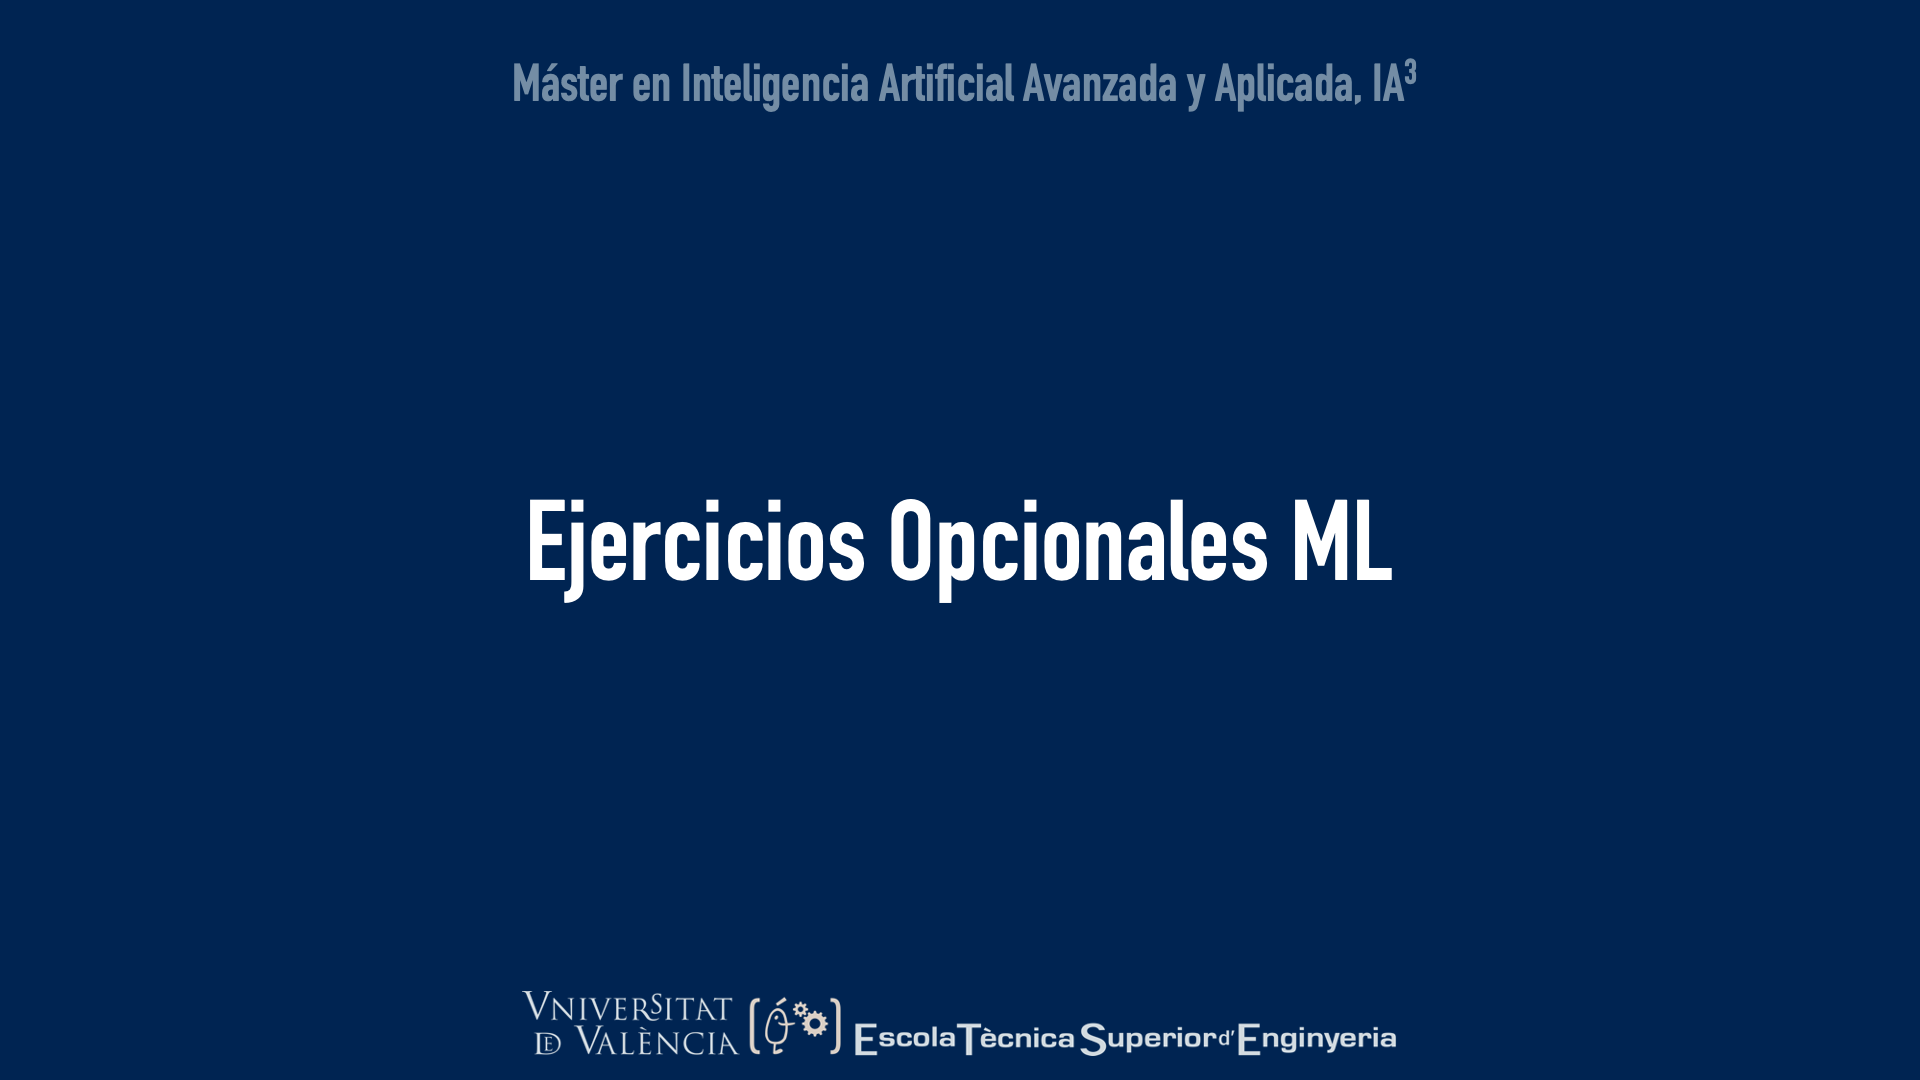

Hello again guys from IDAL IA3 Master Program. To continue with our experience in ML I am here to propose you two different exercises in order to keep progressing. As before, these two exercises are optional and will only increase your score on this mmodule, feel free to do one, both or none of them. The submission should follow the same rules as in the Batmobile exercise. Send me a link to your collaboratory notebook and keep the same groups as before.

# Exercise 01 - 1 Point:

For this exercise I propose you to draw a flow diagram on how to learn on how to use an algorithm, train and evaluate it.

As we learnt in the class this process should contain a block on understanding how this algorithm learn, a block on how to train it including hyperparameters and one block on how you will evaluate and iterate to tune the hyperparameters.

The idea behind this exercise is that visualizing these ideas it will help you create your own framework to work in ML.

Just draw the diagram using diagram.io and upload it to the notebook.

# Exercise 02 - 2 Points:

Now that you have your own framework to work using ML, I propose you to solve the same classification exercise of the pinguins dataset using one of the follow algorithms:

- Logistic Regressions - https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148#:~:text=Logistic%20Regression%20is%20a%20Machine,on%20the%20concept%20of%20probability.&text=The%20hypothesis%20of%20logistic%20regression,function%20between%200%20and%201%20.
- Naive Bayes - https://towardsdatascience.com/naive-bayes-classifier-explained-50f9723571ed#:~:text=Naive%20Bayes%20is%20a%20supervised,prediction%20on%20a%20target%20variable.
- Support Vector Machines (This one is specially difficult to understand and use) - https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989#:~:text=SVM%20or%20Support%20Vector%20Machine,separates%20the%20data%20into%20classes.

Please choose one of the previous algorithms, do the classification exercise and include a small summary of how the algorithm performs against the decission tree and which hyperparameters you should to tune and why.

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from math import log
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [139]:
dataset = sns.load_dataset("penguins")
dataset.dropna(inplace=True)
dataset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


In [140]:
dataset.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


In [141]:
dataset.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


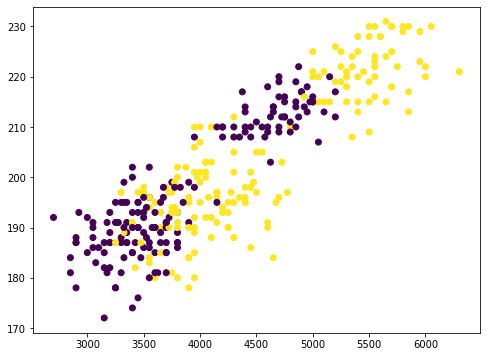

In [142]:
dataset['color']=np.where(dataset['sex']== 'Male', 1, 0)
fig = plt.figure(figsize=(8, 6))
fig = plt.scatter(x=dataset["body_mass_g"], y=dataset["flipper_length_mm"] , c=dataset["color"])

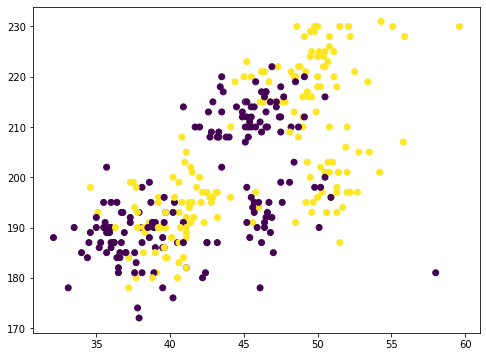

In [143]:
fig = plt.figure(figsize=(8, 6))
fig = plt.scatter(x=dataset["bill_length_mm"], y=dataset["flipper_length_mm"] , c=dataset["color"])
plt.show()

In [144]:
dataset = dataset.iloc[:,:-1]

In [145]:
#Normalizamos los datos
X = pd.get_dummies(dataset.iloc[:,:-1])

In [146]:
Y = dataset.iloc[:,-1:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 150)

In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [148]:
model = LogisticRegression(max_iter=100)
model.fit(X_train, Y_train['sex'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
model.score(X_test, Y_test['sex'])

0.94

In [150]:
precision_score(Y_test, model.predict(X_test), pos_label='Female')

0.9444444444444444

In [151]:
model.score(X_train, Y_train['sex'])

0.9227467811158798

In [152]:
new_probs = []
for value in Y_test['sex']:
  if value == "Male":
    new_probs.append(1.0)
  else:
    new_probs.append(0.0)

In [153]:
fpr, tpr, thresholds = roc_curve(new_probs, list(model.predict_proba(X_test)[:,1]), drop_intermediate=False)
df_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':thresholds})

In [154]:
df_roc

,fpr,tpr,threshold
0,0.000000,0.000000,1.999935
1,0.000000,0.021739,0.999935
2,0.000000,0.043478,0.999289
3,0.000000,0.065217,0.998466
4,0.000000,0.086957,0.997687
...,...,...,...
96,0.925926,1.000000,0.005309
97,0.944444,1.000000,0.004148
98,0.962963,1.000000,0.003942
99,0.981481,1.000000,0.001201


In [155]:
#fig = px.line(df_roc, x='fpr', y='tpr', hover_data=['threshold'])
#fig.show()

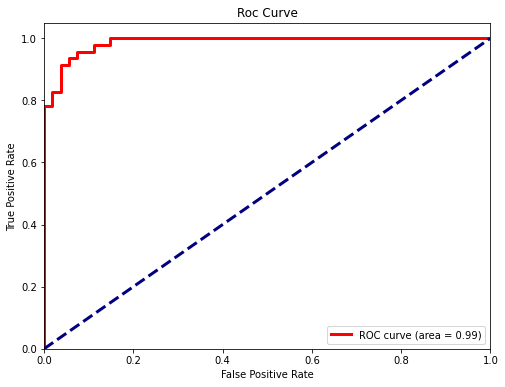

In [157]:
lw=3
fig = plt.figure(figsize=(8, 6))
plt.plot(df_roc['fpr'], df_roc['tpr'], color='red',
         lw=3, label='ROC curve (area = %0.2f)' % roc_auc_score(new_probs, list(model.predict_proba(X_test)[:,1])))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve')
plt.legend(loc="lower right")
plt.show()

In [158]:
roc_auc_score(new_probs, list(model.predict_proba(X_test)[:,1]))

0.9875201288244766

Observamos que al normalizar los datos, mejoramos mucho el resultado inicial, pasando de un accuracy de 0,81 a un accuracy de 0,94 y de una precisión de 0,79 a una de 0,94. En cuanto al area bajo la curva pasamos de 0,91 a 0,98.
